In [28]:
df<-read.csv('d:/data/creditcard/creditcard.csv')

In [29]:
library(dplyr)
df<-df %>% select(-Time)
dim(df)

[1] 284807     30


     0      1 
284315    492 

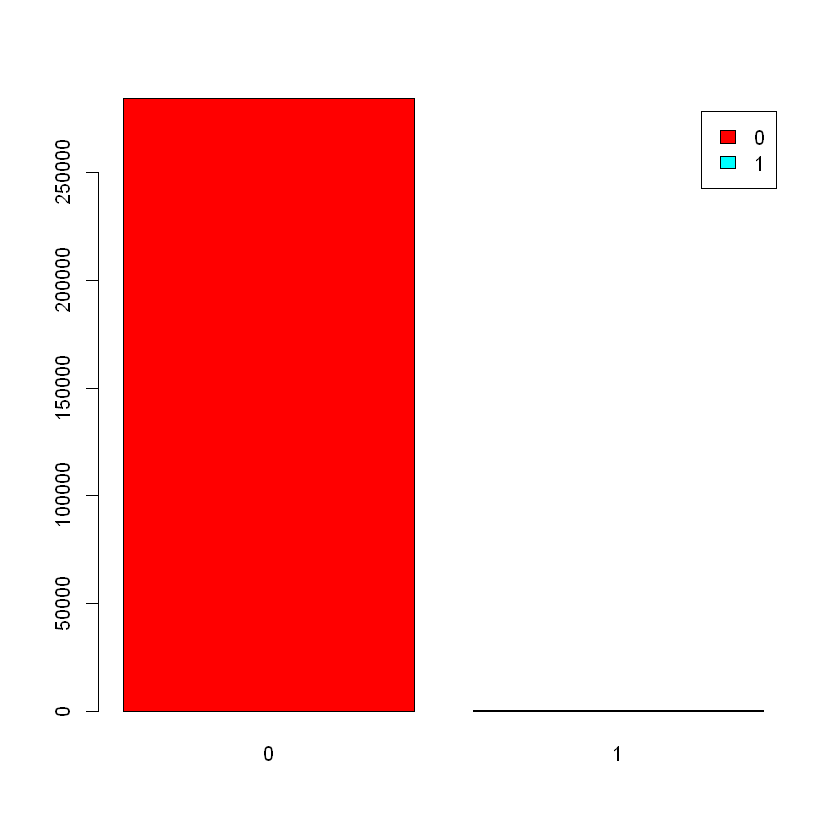

In [30]:
(tbl<-table(df$Class))
barplot(tbl,beside=T,legend=T,col=rainbow(2))
# 0 정상거래 284315건, 1 사기거래 492건 (불균형이 심한 데이터셋)

In [31]:
library(ROSE)
df_samp<-ovun.sample(Class ~. , data=df, seed=1, method='under',
                    N=492*2)$data
(tbl<-table(df_samp$Class))


  0   1 
492 492 

In [37]:
library(caret)
set.seed(123)
#학습용:검증용=8:2로 구분
idx_train<-createDataPartition(y=df_samp$Class, p=0.8, list=F)
train<-df_samp[idx_train,]
X_train<-train[,-30] #학습용
y_train<-train[,30]
test<-df_samp[-idx_train,] #검증용
X_test<-test[,-30]
y_test<-test[,30]

In [38]:
library(party)
model<-ctree(Class ~ . , data=train)

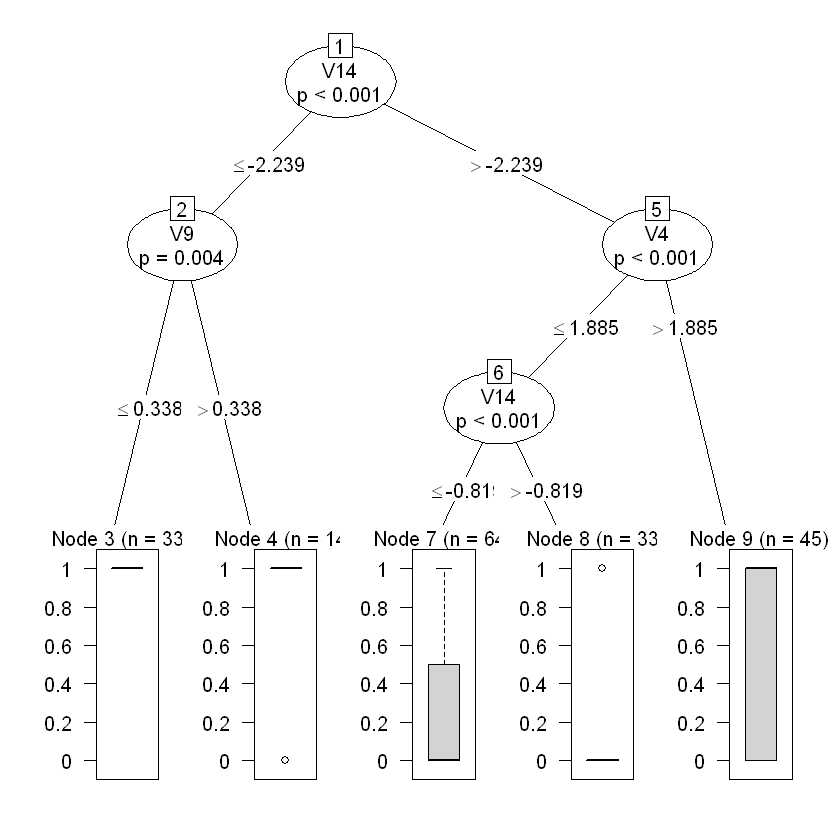

In [39]:
plot(model) #트리 그래프

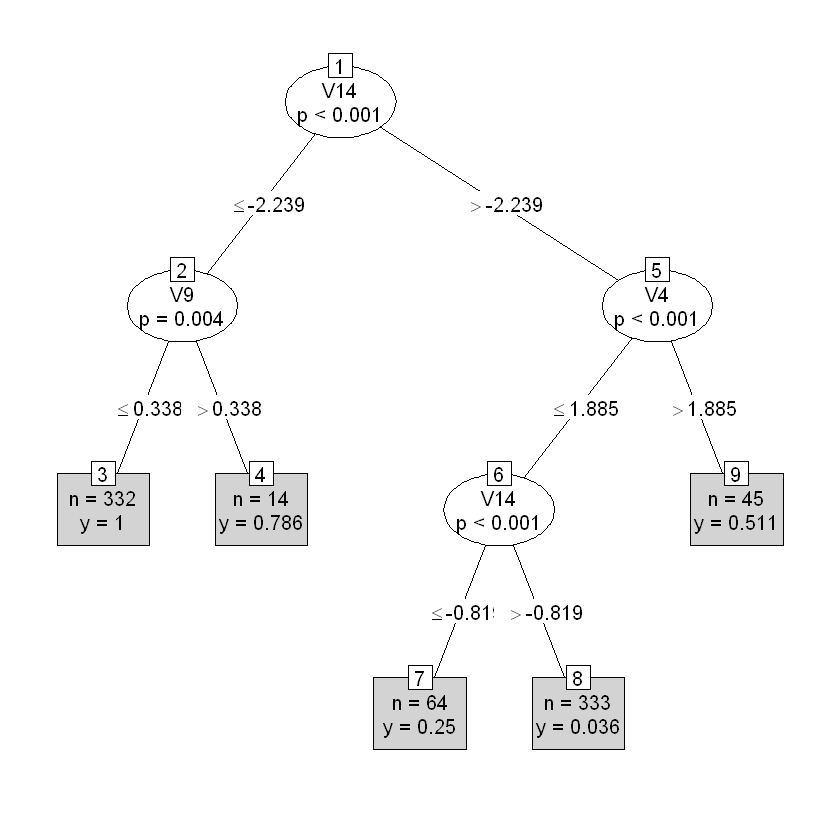

In [40]:
plot(model,type='simple')

In [41]:
#학습용 데이터셋의 예측 정확도
pred<-predict(model,newdata=X_train,type='response')
result<-round(pred)
mean(y_train == result)  #93.2%
table(y_train,result)

[1] 0.9327411

       result
y_train   0   1
      0 369  25
      1  28 366

In [43]:
#검증용 데이터셋의 예측 정확도
pred<-predict(model,newdata=X_test,'response')
result<-round(pred)
mean(y_test == result) #91.3%
table(y_test,result)

[1] 0.9132653

      result
y_test  0  1
     0 94  4
     1 13 85

In [44]:
#랜덤포레스트 모형 (트리스 10)
library(randomForest)
set.seed(1)
model<-randomForest(Class ~. , data=train,
                   mtry=floor(sqrt(ncol(train))),ntree=10,
                   importance=T)
model

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

The following object is masked from 'package:dplyr':

    combine

Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"


Call:
 randomForest(formula = Class ~ ., data = train, mtry = floor(sqrt(ncol(train))),      ntree = 10, importance = T) 
               Type of random forest: regression
                     Number of trees: 10
No. of variables tried at each split: 5

          Mean of squared residuals: 0.06723031
                    % Var explained: 73.11

In [45]:
#학습용 데이터셋의 예측 정확도
pred<-predict(model,newdata=X_train,type='response')
result<-round(pred)
mean(y_train == result)#98.8%
table(y_train,result)

[1] 0.9885787

       result
y_train   0   1
      0 394   0
      1   9 385

In [46]:
#검증용 데이터셋의 예측 정확도
pred<-predict(model,newdata=X_test,type='response')
result<-round(pred)
mean(y_test == result) #92.3%
table(y_test,result)

[1] 0.9234694

      result
y_test  0  1
     0 95  3
     1 12 86

In [47]:
importance(model) #변수의 정확도, 중요도

,%IncMSE,IncNodePurity
V1,-0.1944120,1.0204487
V2,0.4239028,10.8993479
V3,1.3941158,3.4004760
V4,2.7684573,30.8756764
V5,1.1346683,1.7377724
V6,1.0540926,0.6948366
V7,0.8480844,1.0319506
V8,2.3242590,2.4399966
V9,2.0836533,3.4442232
V10,2.6010327,20.9949228


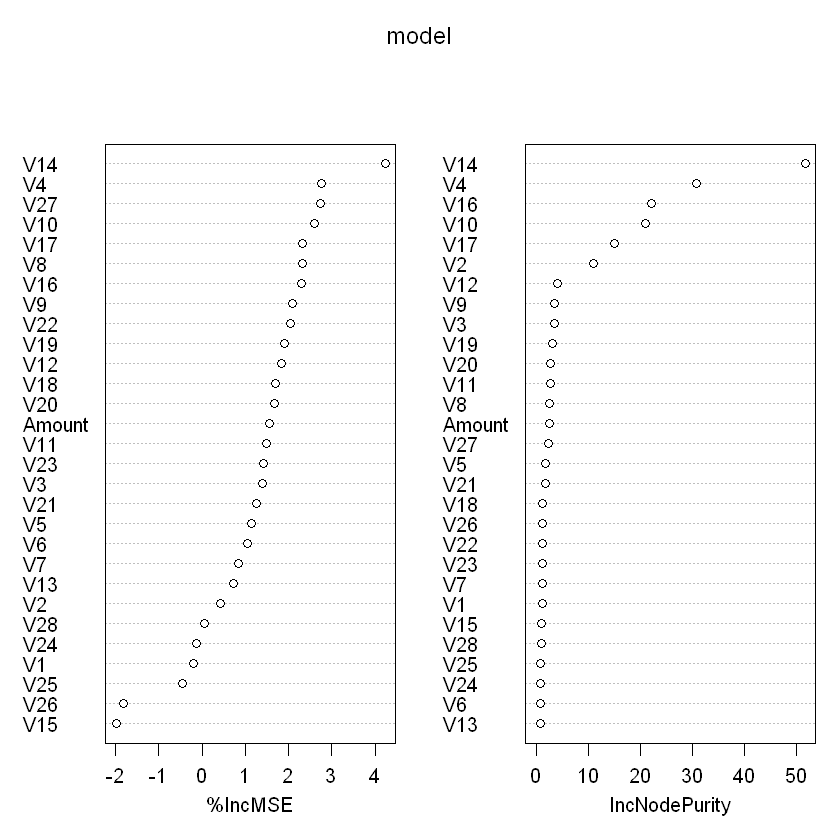

In [48]:
varImpPlot(model)